<a href="https://colab.research.google.com/github/yadavmadhan/Gold-Price-Prediction/blob/main/GoldPricePredictionipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sample Data (First 5 rows):
        Date    Price_USD      Price_INR  Day
0 2025-01-01  1497.238415  124270.788482    0
1 2025-01-02  1515.748304  125807.109246    1
2 2025-01-03  1499.930898  124494.264564    2
3 2025-01-04  1487.671060  123476.697989    3
4 2025-01-05  1503.386982  124781.119501    4

Current USD to INR conversion rate: 1 USD = 83 INR


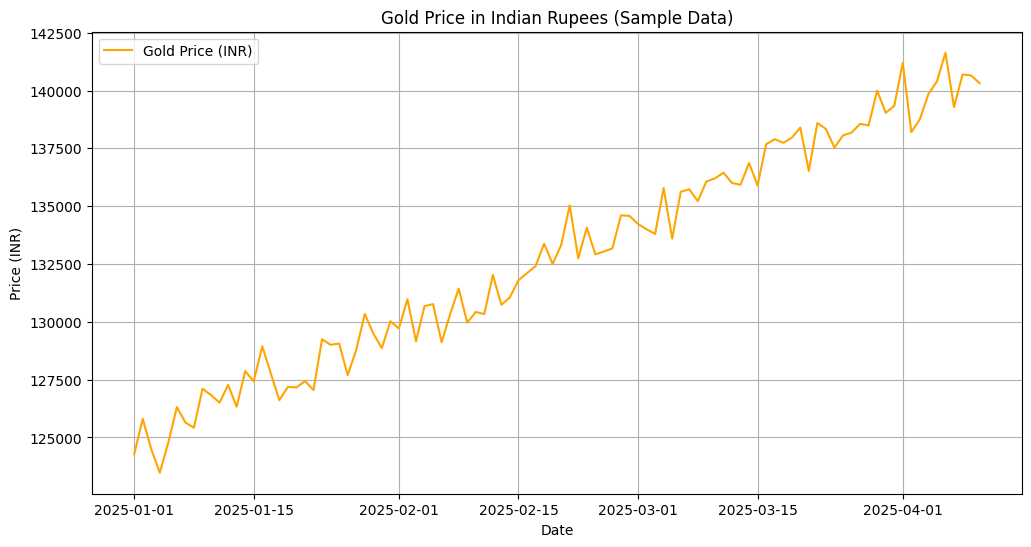


Training set size: 80
Testing set size: 20

Model Coefficients:
Intercept: 124832.48 INR
Slope: 161.37 INR/day (Price increase per day)

Model Evaluation:
Mean Absolute Error: ₹635.50
Mean Squared Error: ₹572079.18
Root Mean Squared Error: ₹756.36
R-squared: 0.98


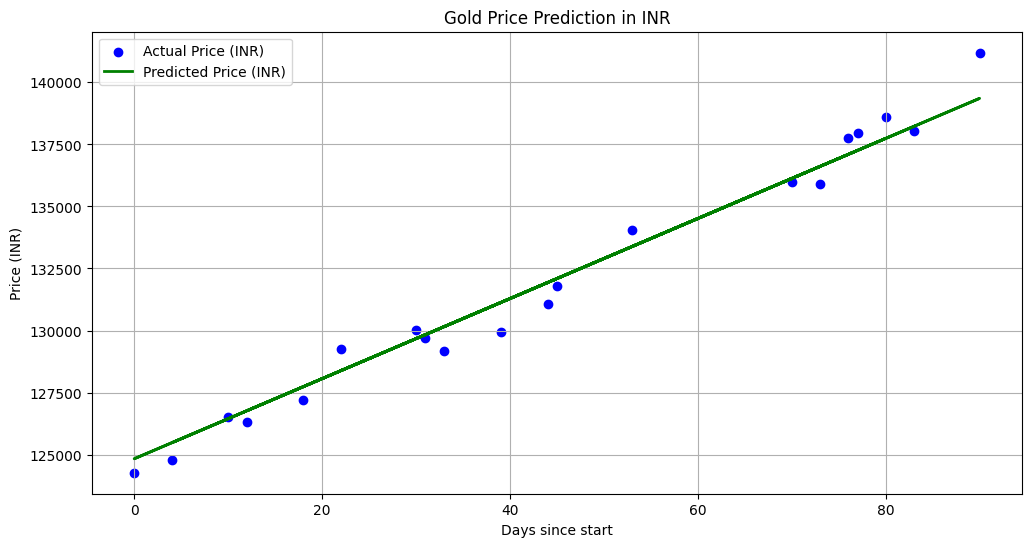


Future Price Predictions:
        Date  Predicted_Price_INR
0 2025-04-11            140968.99
1 2025-04-12            141130.35
2 2025-04-13            141291.72
3 2025-04-14            141453.08
4 2025-04-15            141614.45
5 2025-04-16            141775.81
6 2025-04-17            141937.18
7 2025-04-18            142098.54
8 2025-04-19            142259.91
9 2025-04-20            142421.27


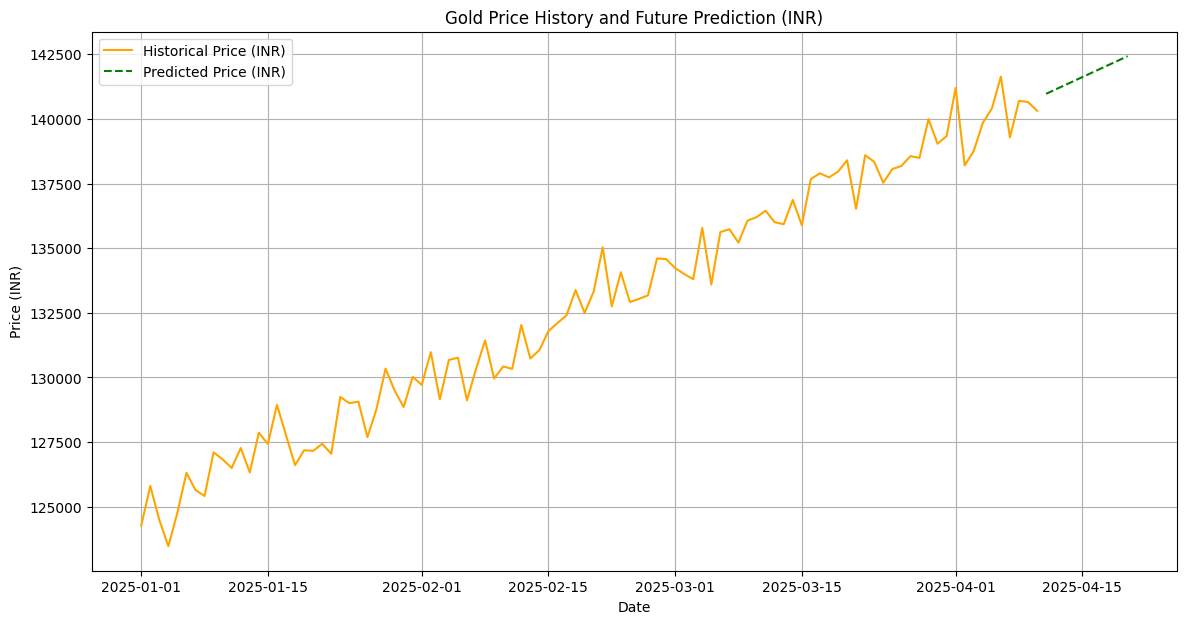

In [ ]:
!pip install pandas numpy matplotlib scikit-learn
# Gold Price Prediction in INR - Google Colab
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Step 1: Set up the data with USD to INR conversion
USD_TO_INR = 83  # Current conversion rate (update this)

# Create sample dataset in USD
data = {
    'Date': pd.date_range(start='2025-01-01', periods=100, freq='D'),
    'Price_USD': [1500 + i*2 + np.random.normal(0, 10) for i in range(100)]
}

df = pd.DataFrame(data)
df['Price_INR'] = df['Price_USD'] * USD_TO_INR  # Convert to INR
df['Day'] = (df['Date'] - df['Date'].min()).dt.days

# Display first few rows
print("Sample Data (First 5 rows):")
print(df.head())
print(f"\nCurrent USD to INR conversion rate: 1 USD = {USD_TO_INR} INR")

## Step 2: Visualize the data in INR
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Price_INR'], label='Gold Price (INR)', color='orange')
plt.title('Gold Price in Indian Rupees (Sample Data)')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.grid(True)
plt.show()

## Step 3: Prepare data for modeling
X = df[['Day']]  # Using day count as feature
y = df['Price_INR']  # Target is INR price

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

## Step 4: Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Print model coefficients
print(f"\nModel Coefficients:")
print(f"Intercept: {model.intercept_:.2f} INR")
print(f"Slope: {model.coef_[0]:.2f} INR/day (Price increase per day)")

## Step 5: Make predictions and evaluate
y_pred = model.predict(X_test)

# Evaluate model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Absolute Error: ₹{mae:.2f}")
print(f"Mean Squared Error: ₹{mse:.2f}")
print(f"Root Mean Squared Error: ₹{rmse:.2f}")
print(f"R-squared: {r2:.2f}")

## Step 6: Visualize predictions
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Price (INR)')
plt.plot(X_test, y_pred, color='green', linewidth=2, label='Predicted Price (INR)')
plt.title('Gold Price Prediction in INR')
plt.xlabel('Days since start')
plt.ylabel('Price (INR)')
plt.legend()
plt.grid(True)
plt.show()

## Step 7: Predict future prices in INR
future_days = pd.DataFrame({'Day': range(df['Day'].max()+1, df['Day'].max()+11)})
future_prices_inr = model.predict(future_days)

# Create dates for future predictions
last_date = df['Date'].max()
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=10)

# Display predictions
future_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted_Price_INR': future_prices_inr,
    'Predicted_Price_USD': future_prices_inr / USD_TO_INR  # Convert back to USD for reference
})

print("\nFuture Price Predictions:")
print(future_df[['Date', 'Predicted_Price_INR']].round(2))

## Step 8: Visualize historical and future predictions
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Price_INR'], label='Historical Price (INR)', color='orange')
plt.plot(future_df['Date'], future_df['Predicted_Price_INR'], 'g--', label='Predicted Price (INR)')
plt.title('Gold Price History and Future Prediction (INR)')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.grid(True)
plt.show()